In [1]:
import pandas as pd

In [2]:
#DATA PREPROCESSING

In [3]:
dataset = pd.read_csv("insurance_pre.csv")
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [4]:
#ONE HOT ENCODING for Nominal Data
dataset=pd.get_dummies(dataset, drop_first=True)
dataset = dataset.astype(int)
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27,0,16884,0,1
1,18,33,1,1725,1,0
2,28,33,3,4449,1,0
3,33,22,0,21984,1,0
4,32,28,0,3866,1,0
...,...,...,...,...,...,...
1333,50,30,3,10600,1,0
1334,18,31,0,2205,0,0
1335,18,36,0,1629,0,0
1336,21,25,0,2007,0,0


In [5]:
#SPLITTING INDEPENDENT (INPUT) AND DEPENDENT (OUTPUT) VARIABLE
#To view columns in the dataset
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [6]:
independent=dataset[['age', 'bmi', 'children', 'sex_male', 'smoker_yes']]
independent

,age,bmi,children,sex_male,smoker_yes
0,19,27,0,0,1
1,18,33,1,1,0
2,28,33,3,1,0
3,33,22,0,1,0
4,32,28,0,1,0
...,...,...,...,...,...
1333,50,30,3,1,0
1334,18,31,0,0,0
1335,18,36,0,0,0
1336,21,25,0,0,0


In [7]:
dependent=dataset[['charges']]
dependent

,charges
0,16884
1,1725
2,4449
3,21984
4,3866
...,...
1333,10600
1334,2205
1335,1629
1336,2007


In [8]:
#SPLITTING TRAINING AND TEST SET

In [9]:
#Model Selection
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(independent, dependent, test_size=0.30, random_state=0)

In [10]:
#Multiple Linear Regression -- START

In [11]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [12]:
weight=regressor.coef_
weight

array([[  257.95713126,   320.30709672,   474.41409474,   -39.78524427,
        23432.77389712]])

In [13]:
bias=regressor.intercept_
bias

array([-11891.63040125])

In [14]:
#Multiple Linear Regression -- END

In [15]:
#Support Vector machine -- START

In [29]:
#Standardization Technique for model optimization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [102]:
from sklearn.svm import SVR
regressor=SVR(kernel="poly", C=1000)
regressor.fit(X_train, Y_train)

C:\Anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1000, kernel='poly')

In [103]:
regressor.intercept_

array([8470.75288291])

In [108]:
regressor.n_support_

array([936])

In [ ]:
#Support Vector machine -- END

In [ ]:
#Decision Tree -- START

In [228]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion='poisson', splitter='random',max_features=None)
regressor=regressor.fit(X_train,Y_train)

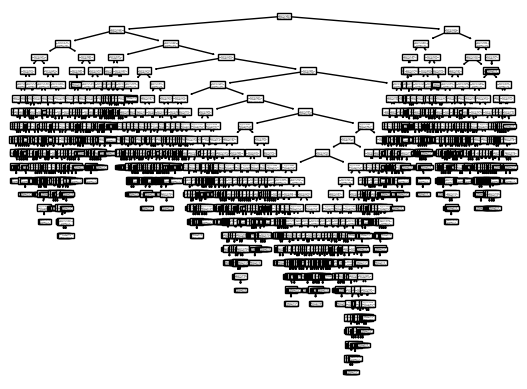

In [229]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [ ]:
#Decision Tree -- END

In [ ]:
#Random Forest -- START

In [316]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=100,random_state=0,criterion='squared_error',max_features='sqrt')
regressor.fit(X_train, Y_train)

C:\Users\HP\AppData\Local\Temp\ipykernel_8464\2891844213.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, Y_train)


RandomForestRegressor(max_features='sqrt', random_state=0)

In [317]:
#Random Forest -- END

In [318]:
y_pred=regressor.predict(X_test)

In [319]:
#Evaluation Metrics
from sklearn.metrics import r2_score
r_score=r2_score(Y_test, y_pred)

In [320]:
r_score

0.8674254724623967

In [326]:
#Save finalized Model - dump the final model on the same file
import pickle
filename="finalized_model_Regression_Assignment.sav"
pickle.dump(regressor,open(filename,'wb'))

In [327]:
#Load the file and test the model
loaded_model=pickle.load(open("finalized_model_Regression_Assignment.sav",'rb'))
result=loaded_model.predict([[34,28,2,0,0]])

In [325]:
result

array([14575.895])